In [1]:
'''
activation
활성화 함수 : linear(선형회귀) : 연속적인 값에 대한 결과를 가져올 때 
             sigmoid(참/거짓:이항) : 렐루(ReLU), 
                                    하이퍼볼릭 탄젠트(hyperbolic tangent) 
                                    소프트플러스(softplus) 
             softmax(다항분류 : 출력결과가 여러개인 경우) : 0.2 + 0.6 + 0.3 = 1 :최고값이 답
loss              
손실 함수 : 평균제곱 오차(mse) : mean_squared_error 
           평균절대 오차(mae)
           평균절대백분율오차(mape)
           평균제곱로그오차(msle) 
           이항교차엔트로피(binary_crossentropy):이항분류
           범주형교차엔트로피(calegorical_crossentropy) : 다항분류
optimizer           
오차 수정 함수: 경사 하강법(gd) : 확률적경사하강법(sgd) : 아다그라이드(adagrad) : 알엠에스프롭(RMSProp) : 아담(adam)
                                                       모멘텀(momentum)                            : 아담(adam)
metrics                                                                                                   : 네스레포트 모멘텀(NAG) 
모델 수행의 결과 출력 :  
            accuracy : 학습셋에 대한 정확도에 기반해 결과를 출력 
            loss : 학습셋에 대한 손실 값을 나타냄
            val_acc : 테스트셋에 대한 정확도를 나타냄
            val_loss : 테스트셋에 대한 손실 값을 나타냄
'''
print()              

In [22]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np

#데이터를 불러 옴
df = pd.read_csv("https://raw.githubusercontent.com/SoongMoo/soldesk20231218/main/data/house_train.csv")
df
# NaN확인
df.isnull().sum().sort_values(ascending=False).head(20)
# 원-핫 인코딩
#카테고리형 변수를 0과 1로 이루어진 변수
df = pd.get_dummies(df)
#결측치를 각 칼럼의 평균으로 대체
df = df.fillna(df.mean())
df
# 속성과 클래스로 분리
cols_train = ['OverallQual', 'GrLivArea','GarageCars','GarageArea','TotalBsmtSF']
X_train_pre = df[cols_train] 
y = df['SalePrice'].values
# 학습셋과 테스트셋
X_train, X_test, y_train, y_test = train_test_split(X_train_pre, y, test_size = 0.2)
#모델의 구조를 설정합니다
# * 노드의 수를 늘리면
#  - 모델은 더 다양하고 복잡한 특징과 패턴을 학습할 수 있음
#  - 노드 수를 무작정 늘리면 과적합의 위험이 증가할 수 있음
#  - 노드 수가 많을수록 모델의 계산 비용이 증가 함
#  - 데이터의 특성, 문제의 복잡성, 사용 가능한 훈련 데이터 양 등을 고려하여 노드 수를 조절해야 함
# * 노드 수를 정하는 방법
#  - 교차 검증, 그리드 서치, 경험적 방법
#  - 자동화된 하이퍼파라미터 최적화 도구 사용
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(30, activation='relu'))
model.add(Dense(40, activation='relu'))
model.add(Dense(1))
#모델 실행
model.compile(optimizer ='adam', loss = 'mse')
# 20회 이상 결과가 향상되지 않으면 자동으로 중단
early_stopping_callback = EarlyStopping(monitor='val_loss' , patience=20)
# 모델의 이름을 정합니다.
modelpath = "./data/model/house.hdf5"
# 최적화 모델을 업데이트하고 저장
checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=0, save_best_only = True)
# 검증셋(validation_split) : 25%
history = model.fit(X_train, y_train, epochs=2000, batch_size=32, validation_split=0.25
                    ,callbacks=[early_stopping_callback, checkpointer] )

Epoch 1/2000
28/28 [==============================] - 1s 10ms/step - loss: 37612597248.0000 - val_loss: 41681199104.0000
Epoch 2/2000
28/28 [==============================] - 0s 3ms/step - loss: 36965040128.0000 - val_loss: 40636919808.0000
Epoch 3/2000
 1/28 [>.............................] - ETA: 0s - loss: 29261619200.0000

C:\Users\sdedu\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\engine\training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


28/28 [==============================] - 0s 3ms/step - loss: 35386712064.0000 - val_loss: 37988917248.0000
Epoch 4/2000
28/28 [==============================] - 0s 3ms/step - loss: 31727953920.0000 - val_loss: 32266131456.0000
Epoch 5/2000
28/28 [==============================] - 0s 3ms/step - loss: 24756318208.0000 - val_loss: 22616352768.0000
Epoch 6/2000
28/28 [==============================] - 0s 3ms/step - loss: 14738793472.0000 - val_loss: 11087406080.0000
Epoch 7/2000
28/28 [==============================] - 0s 3ms/step - loss: 5681194496.0000 - val_loss: 3677386496.0000
Epoch 8/2000
28/28 [==============================] - 0s 3ms/step - loss: 2468206336.0000 - val_loss: 2228816640.0000
Epoch 9/2000
28/28 [==============================] - 0s 3ms/step - loss: 2386123520.0000 - val_loss: 2258465280.0000
Epoch 10/2000
28/28 [==============================] - 0s 3ms/step - loss: 2348182784.0000 - val_loss: 2263570688.0000
Epoch 11/2000
28/28 [==============================] - 0s 2m

In [35]:
real_prices =[]    # 시각화를 위해 실제값 저장
pred_prices = []   # 시각화를 위해 예측값 저장
X_num = [] 
# SalePrice의 예측 값
Y_prediction = model.predict(X_test)
y_test
Y_prediction
n_iter = 0
for i in range(25):
    real = y_test[i]
    prediction = Y_prediction[i]
    print(f"실제가격 : {real:.2f},  예측 값 : {prediction[0]:.2f} ")
    real_prices.append(real)
    pred_prices.append(prediction[0])
    n_iter += 1
    X_num.append(n_iter)

10/10 [==============================] - 0s 887us/step
실제가격 : 163000.00,  예측 값 : 185448.70 
실제가격 : 262280.00,  예측 값 : 257056.66 
실제가격 : 324000.00,  예측 값 : 226423.39 
실제가격 : 118000.00,  예측 값 : 170948.20 
실제가격 : 177000.00,  예측 값 : 162577.47 
실제가격 : 177000.00,  예측 값 : 191365.70 
실제가격 : 143000.00,  예측 값 : 194215.41 
실제가격 : 177500.00,  예측 값 : 165820.45 
실제가격 : 130000.00,  예측 값 : 138561.78 
실제가격 : 181000.00,  예측 값 : 177981.42 
실제가격 : 85000.00,  예측 값 : 134569.84 
실제가격 : 163000.00,  예측 값 : 170167.06 
실제가격 : 172500.00,  예측 값 : 181513.39 
실제가격 : 159000.00,  예측 값 : 183683.56 
실제가격 : 120000.00,  예측 값 : 116257.59 
실제가격 : 179900.00,  예측 값 : 171462.78 
실제가격 : 147000.00,  예측 값 : 255179.75 
실제가격 : 139000.00,  예측 값 : 156996.22 
실제가격 : 167500.00,  예측 값 : 132846.58 
실제가격 : 164500.00,  예측 값 : 175262.19 
실제가격 : 189000.00,  예측 값 : 236315.91 
실제가격 : 169500.00,  예측 값 : 187498.05 
실제가격 : 146000.00,  예측 값 : 166763.09 
실제가격 : 85000.00,  예측 값 : 154936.98 
실제가격 : 283463.00,  예측 값 : 242158.70 


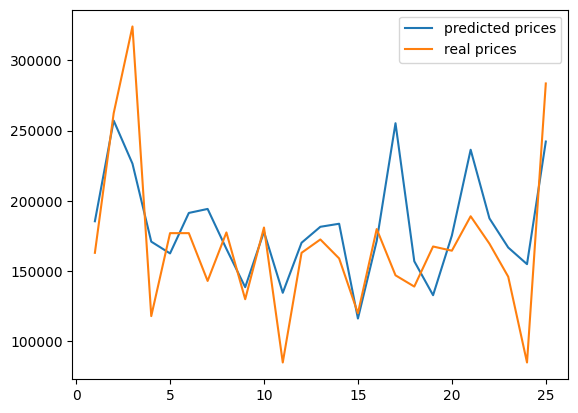

In [38]:
import matplotlib.pyplot as plt
plt.plot(X_num, pred_prices, label = "predicted prices")
plt.plot(X_num, real_prices, label = "real prices")
plt.legend()
plt.show()

array([[[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       ...,

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]],

       [[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 

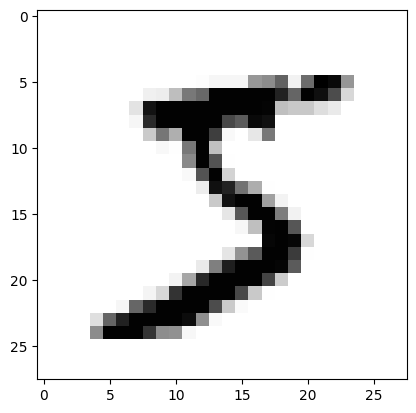

In [154]:
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt
# MNIST 데이터셋을 불러와 학습셋과 테스트셋으로 저장합니다
(X_train, y_train), (X_test, y_test) = mnist.load_data()
X_train.shape[0] # 60000
X_test.shape[0] # 10000
plt.imshow(X_train[0],cmap='Greys')

In [38]:
import sys
for x in X_train[0]:
    for i in x:
        sys.stdout.write("%-3s" % i)
    sys.stdout.write("\n")

TypeError: 'numpy.float32' object is not iterable

In [177]:
from tensorflow.keras.utils import to_categorical
X_train[0]
# 차원 변환
X_train = X_train.reshape(X_train.shape[0], 784)
X_train.shape
X_train = X_train.astype('float64')
X_train = X_train / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float64') / 255
# 속성 : X_train[0]
# class : y_train[0]
y_train[0]
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10) 
# 0 : 1000000000
# 1 : 0100000000
# 2 : 0010000000
#...
# 5 : 0000010000
#...
# 9 : 0000000001
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [30]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.callbacks import ModelCheckpoint,EarlyStopping
from tensorflow.keras.datasets import mnist
from tensorflow.keras.utils import to_categorical
import numpy as np
# 데이터 불러오기 
# MNIST 데이터를 불러옵니다. 
(X_train, y_train), (X_test, y_test) = mnist.load_data()
# 차원 변환 : 2차원을 평면(1차원)으로 변환 (28, 28)
X_train = X_train.reshape(X_train.shape[0], 28*28).astype('float32') / 255
X_test = X_test.reshape(X_test.shape[0], 784).astype('float32') / 255
# 0 ~ 255로 되어 있는 값을 0 ~ 1사이의 값으로 변경

# 원-핫 인코딩 :   class = 0는 1의 값을 가지도록
y_train = to_categorical(y_train, 10)
y_test  = to_categorical(y_test, 10)

# 모델 구조를 설정
model = Sequential()
model.add(Dense(512, input_dim=784, activation='relu'))
model.add(Dense(10, activation='softmax'))

# 모델 실행 
model.compile(loss='categorical_crossentropy', optimizer='adam', \
              metrics=['accuracy'])
# 모델 최적화
modelpath= "./data/model/MNIST_MLP.hdf5"
early_stopping_callback = EarlyStopping(monitor='val_loss' ,patience=10 )
checkpointer = ModelCheckpoint(filepath=modelpath ,monitor='val_loss' \
                               ,verbose=0,save_best_only=True)
# 모델 학습
history = model.fit(X_train,y_train, validation_split=0.25 ,  epochs=30 \
    , batch_size=200, verbose=1,callbacks=[early_stopping_callback,checkpointer])
# 테스트 정확도
model.evaluate(X_test, y_test)[1]

Epoch 1/30
225/225 [==============================] - 2s 5ms/step - loss: 0.3524 - accuracy: 0.9013 - val_loss: 0.1903 - val_accuracy: 0.9479
Epoch 2/30
225/225 [==============================] - 1s 5ms/step - loss: 0.1486 - accuracy: 0.9575 - val_loss: 0.1448 - val_accuracy: 0.9575
Epoch 3/30
225/225 [==============================] - 1s 5ms/step - loss: 0.0982 - accuracy: 0.9719 - val_loss: 0.1205 - val_accuracy: 0.9648
Epoch 4/30
225/225 [==============================] - 1s 5ms/step - loss: 0.0714 - accuracy: 0.9803 - val_loss: 0.1013 - val_accuracy: 0.9701
Epoch 5/30
225/225 [==============================] - 1s 5ms/step - loss: 0.0554 - accuracy: 0.9846 - val_loss: 0.0907 - val_accuracy: 0.9736
Epoch 6/30
225/225 [==============================] - 1s 5ms/step - loss: 0.0415 - accuracy: 0.9891 - val_loss: 0.0901 - val_accuracy: 0.9721
Epoch 7/30
225/225 [==============================] - 1s 5ms/step - loss: 0.0317 - accuracy: 0.9920 - val_loss: 0.0849 - val_accuracy: 0.9751
Epoch 

0.9828000068664551

In [ ]:
# 이미지 전처리
image_path = 'img6.jpg'
image = Image.open(image_path)
image = image.convert('L')  # 흑백 이미지로 변환
image = image.resize((28, 28))  # 28x28 크기로 조정
image = np.asarray(image)
image = image.reshape(1, 28*28).astype('float32') / 255
image = abs(1 - image)

# 예측하기
#prediction = model.predict(image)
digit = np.argmax(prediction)
print("예측 결과:", digit)

In [ ]:
import sys
for x in image:
    for i in x:
        sys.stdout.write("%-3.1s" % i)
    sys.stdout.write("\n")

In [ ]:
y_val_loss = history.history['val_loss'] # 테스트 셋
y_loss = history.history['loss'] # 학습 셋
x_len = np.arange(len(y_loss))
plt.plot(x_len, y_val_loss, marker=".", c = "red" , label = "Testset_loss")
plt.plot(x_len, y_loss, marker=".", c = "blue" , label = "Trainset_loss")

plt.legend(loc = "upper right")
plt.grid()
plt.xlabel("cpoch")
plt.ylabel("loss")
plt.show()

In [198]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding
from tensorflow.keras.utils import to_categorical 
from numpy import array
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# 텍스트 전처리와 관련한 함수
from tensorflow.keras.preprocessing.text import text_to_word_sequence
# 전처리할 텍스트
text = "해보지 않으면 해낼 수 없다"
# 해당 텍스트를 토큰화
result = text_to_word_sequence(text)
result

['해보지', '않으면', '해낼', '수', '없다']

In [ ]:
# 전처리하려는 세 개의 문장을 정합니다
docs = ['먼저 텍스트의 각 단어를 나누어 토큰화 합니다.',
        '텍스트의 단어로 토큰화해야 딥러닝에서 인식됩니다.',
       '토큰화한 결과는 딥러닝에서 사용할 수 있습니다.']

token = Tokenizer()
token.fit_on_texts(docs)
### 빈도수를 확인
token.word_counts
# 문장의 수
token.document_count
# 각 단어의 index
token.word_index

In [219]:
text = '먼저 텍스트의 각 단어를 나누어 토큰화 합니다.'
token = Tokenizer()
token.fit_on_texts([text])
token.word_index
token.word_index['먼저'] # 단어가 키가 된 걸 확인 할 수 있다.
x = token.texts_to_sequences([text])
x
'''
1 : 01000000  : 먼저
2 : 00100000  : 텍스트의
3 : 00010000  : 각
4 : 00001000  : 단어를
5 : 00000100  : 나누어
6 : 00000010  : 토큰화
7 : 00000001  : 합니다.
'''
# 원-핫 인코딩 배열 만들기
x = to_categorical(x, len(token.word_index) + 1 )
x

[[1, 2, 3, 4, 5, 6, 7]]

In [ ]:
# 텍스트 리뷰 자료
docs = ["너무 재밌네요","최고예요","참 잘 만든 영화예요","추천하고 싶은 영화입니다"
        ,"한번 더 보고싶네요","글쎄요","별로예요","생각보다 지루하네요",
        "연기가 어색해요","재미없어요"]
# 긍정 리뷰는 1, 부정 리뷰는 0
classes = array([1,1,1,1,1,0,0,0,0,0])
# 토큰화 
token = Tokenizer()
token.fit_on_texts(docs)
print(token.word_index)
x = token.texts_to_sequences(docs)
print(x)
# 패딩, 서로 다른 길이의 데이터를 4로 맞추어 줍니다.: pad_sequences
padded_x = pad_sequences(x, 4)
padded_x
# 임베딩
# 입력될 단어의 수
word_size = len(token.word_index) + 1
# 단어 임베딩을 포함하여 딥러닝 모델을 만듦
model = Sequential()
model.add(Embedding(word_size, 8, input_length=4)) # 임베딩
model.add(Flatten())
model.add(Dense(1 , activation="sigmoid"))
# 모델 실행
model.compile(optimizer="adam", loss = "binary_crossentropy", metrics=['accuracy'])
model.fit(padded_x, classes,epochs=20)

In [248]:
text = "참 잘 만든 영화예요"
x_text = token.texts_to_sequences([text])
padded_x_text = pad_sequences(x_text, 4)
# 예측
result = model.predict(padded_x_text)
print(result)
print(type(result))
if result[0 , 0] >= 0.5:
    print(f"'{text}'는 긍정입니다.")
else:
    print(f"'{text}'는 부정입니다.")

1/1 [==============================] - 0s 50ms/step
[[0.5424985]]
<class 'numpy.ndarray'>
'참 잘 만든 영화예요'는 긍정입니다.
